# Initial Setup

In [113]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [114]:
# Load and split dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [115]:
# Normalize pixel values to be between 0 and 1
np.unique(y_train, return_counts=True)
x_train, x_test = x_train/255, x_test/255

# Model Definition and Training: Building, Compiling, and Fitting the Neural Network

The Flatten layer converts the 28x28 pixel image into a 1D array of 784 values so the model can process it. The first Dense layer with 256 neurons helps the model learn patterns from the input data using the ReLU activation function. The Dropout layer randomly disables 30% of neurons to prevent overfitting by making the model more general. The second Dense layer with 128 neurons further helps the model learn more complex patterns, again using ReLU. Another Dropout layer is added to keep the model from memorizing the data and overfitting. Finally, the Dense layer with 10 neurons outputs the probabilities for each digit (0-9), using the softmax function to decide the most likely digit to predict.

In [116]:
# Define a neural network model with layers for flattening, dense, and dropout to prevent overfitting
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

In [117]:
# Compile the model with an optimizer, loss function, and metrics for evaluation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [118]:
# Epochs allow the model to learn from the data over 20 iterations, improving its performance with each pass.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8493 - loss: 0.4925 - val_accuracy: 0.9580 - val_loss: 0.1277
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9548 - loss: 0.1570 - val_accuracy: 0.9694 - val_loss: 0.0926
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9642 - loss: 0.1159 - val_accuracy: 0.9732 - val_loss: 0.0826
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9702 - loss: 0.0933 - val_accuracy: 0.9777 - val_loss: 0.0715
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9751 - loss: 0.0832 - val_accuracy: 0.9776 - val_loss: 0.0751
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9753 - loss: 0.0787 - val_accuracy: 0.9769 - val_loss: 0.0739
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9778 - loss: 0.0705 - val_accuracy: 0.9800 - val_loss: 0.0640
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9796 - loss: 0.0648

# Learning Curves: Training and Test Accuracy vs Epoch

Removing memorization helps the model focus on learning general patterns instead of just remembering the training data. This way, it performs better on new, unseen data and improves its accuracy on test datasets.

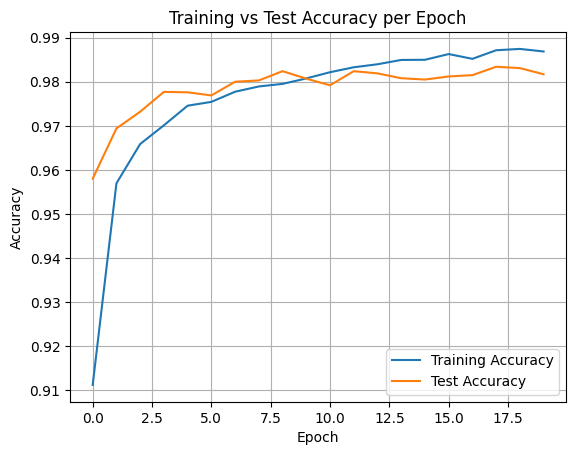

In [119]:
# Plot Training Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

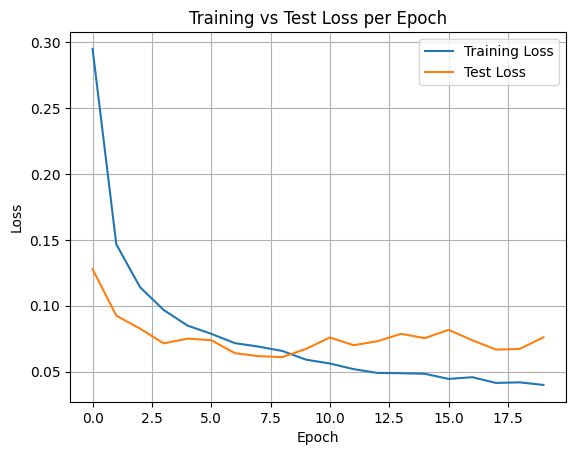

In [120]:
# Plot the training and test loss over epochs to visualize the model's performance
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Test Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()